In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import metrics
from itertools import cycle

In [2]:
#Loading Dataset
#-------------------------------------------------------------------------------#
train = pd.read_csv('r8-train-all-terms.txt', header=None, sep='\t')
test = pd.read_csv('r8-test-all-terms.txt', header=None, sep='\t')
train.columns = ['label', 'content']
test.columns = ['label', 'content']
train['lenght'] = train['content'].str.len()
lenght_mn=train['lenght'].mean()
train['lenght_mean']=(lambda x: train['lenght']/lenght_mn)(train['lenght'].values)
train['words_num'] = train['content'].str.split().str.len()
train['words_len_med'] = train['content'].str.len()/train['words_num']
train['words_num_norm'] = (train['words_num'] - train['words_num'].min())/(train['words_num'].max()-train['words_num'].min())
train['words_len_med_norm'] = (train['words_len_med'] - train['words_len_med'].min())/(train['words_len_med'].max()-train['words_len_med'].min())
train['lenght_norm'] = (train['lenght'] - train['lenght'].min())/(train['lenght'].max()-train['lenght'].min())
train['words_num_norm'] = (train['words_num'] - train['words_num'].min())/(train['words_num'].max()-train['words_num'].min())
train['words_len_med_norm'] = (train['words_len_med'] - train['words_len_med'].min())/(train['words_len_med'].max()-train['words_len_med'].min())

#-------------------------------------------------------------------------------#
#Printing first rows
train.head()


,label,content,lenght,lenght_mean,words_num,words_len_med,words_num_norm,words_len_med_norm,lenght_norm
0,earn,champion products ch approves stock split cham...,361,0.596235,62,5.822581,0.059437,0.438223,0.062868
1,acq,computer terminal systems cpml completes sale ...,1246,2.057919,210,5.933333,0.213764,0.459119,0.230959
2,earn,cobanco inc cbco year net shr cts vs dlrs net ...,221,0.365008,44,5.022727,0.040667,0.287307,0.036277
3,earn,am international inc am nd qtr jan oper shr lo...,465,0.768003,93,5.000000,0.091762,0.283019,0.082621
4,earn,brown forman inc bfd th qtr net shr one dlr vs...,151,0.249395,35,4.314286,0.031283,0.153639,0.022982


In [3]:
#Definition of variable X
X = np.array(list(zip(train.words_len_med_norm, train.lenght_norm)))


Silhouette Coefficient: 0.214


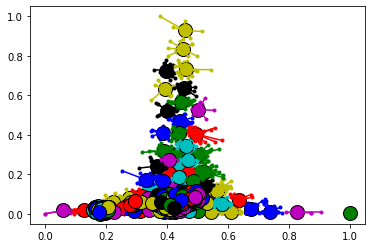

In [4]:
#Fitting X using affinity Propagation Clustering
afprop = AffinityPropagation(max_iter=1000)
afprop.fit(X)
labels = afprop.labels_
cluster_centers_indices = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
# Predict the cluster for all the samples
P = afprop.predict(X)

# Generate scatter plot for training data
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(figsize=(10, 10))
plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
      
